# <p style="text-align:center;">Lập trình song song - CQ2021/21</p>
# <p style="text-align:center;">ĐỒ ÁN CUỐI KỲ</p>
## <p style="text-align:center;">Triển khai và tối ưu ANN</p>
### <p style="text-align:center;">Nhóm 8</p>

# 1. Thành viên
MSSV | Họ tên
--- | ---
21120403 | Nguyễn Hoàng Quân
21120407 | Trần Phan Phúc Ân
21120429 | Lưu Kiến Đạt

# 2. Yêu cầu đề bài

- ### Triển khai và tối ưu một ANN truyền thống.
- ### Mục tiêu tìm hiểu: Sử dụng CUDA để triển khai và tối ưu ANN, trình bày được cách tiếp cận của các phương pháp tối ưu.

## 2.1 Input
- ### Đồ án này sử dụng Fashion-MNIST là bộ dữ liệu từ hình ảnh bài báo của Zalando, bao gồm tập train chứa 60,000 phần tử vầ tập test chứa 10,000 phần tử. Mỗi phần tử là một bức ảnh xám có kích thước 28x28 pixel và được phân loại bởi 10 lớp khác nhau. Fashion-MNIST có cấu trúc tương tự tập dữ liệu gốc MNIST để phù hợp với việc đánh giá và xây dựng mô hình.

&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;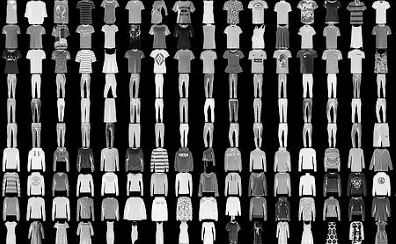

## 2.2 Output
- ### Thời gian chạy trên toàn bộ epoch (bao gồm cả việc encode tập train label và kiểm thử trên tập test).
- ### Thời gian chạy mà mỗi layer chiếm.
- ### Độ chính xác sau cùng của mô hình.

# 3. Nội dung chính

## 3.1 Artificial Neural Network là gì?

- Theo `Wikipedia`, mạng neural nhân tạo là một mô hình toán học hay mô hình tính toán được xây dựng dựa trên các mạng neural sinh học. Nó gồm có một nhóm các neural nhân tạo nối với nhau, và xử lý thông tin bằng cách truyền theo các kết nối và tính giá trị mới tại các neural.  
- `Reference`: https://vi.wikipedia.org/wiki/M%E1%BA%A1ng_th%E1%BA%A7n_kinh_nh%C3%A2n_t%E1%BA%A1o 
- ANN gồm 3 thành phần chính: Input layer, Hidden layer, Output layer. Trong đó, có thể có nhiều Hidden layer.

&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;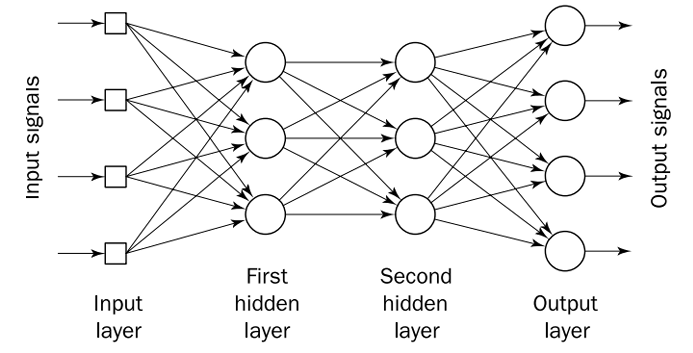

### 3.1.a Forward Propagation

- Forward propagation là quá trình dữ liệu đầu vào được truyền qua các layer để cho ra kết quả sau cùng, nó bao gồm các bước:
    - Input layer: dữ liệu đi vào mạng neural.
    - Hidden layer: dữ liệu được đi qua các lớp hidden layer, mỗi layer sẽ chứa một đặc điểm nhận dạng nào đó của dữ liệu, trọng số đầu ra của các neuron sẽ đi qua activation function như ReLU để tính tổng và lấy làm trọng số cho neuron ở layer kế tiếp mà chúng nối tới.
    - Output layer: những đặc điểm đã được nhận dạng sẽ cho ra các trọng số cho thấy kết quả dự đoán mà mô hình hướng tới, dữ liệu này có thể đi activation function như softmax để làm kết quả cho bài toán phân lớp.
    - Predictions: từ kết quả nhận được, ta thực hiện dự đoán và đánh giá, điều chỉnh trọng số để cải thiện mô hình.
- Việc điều chỉnh trọng số có thể được thực hiện hiệu quả với phương pháp Backpropagation.
- `Reference`: https://www.geeksforgeeks.org/what-is-forward-propagation-in-neural-networks/ 

&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;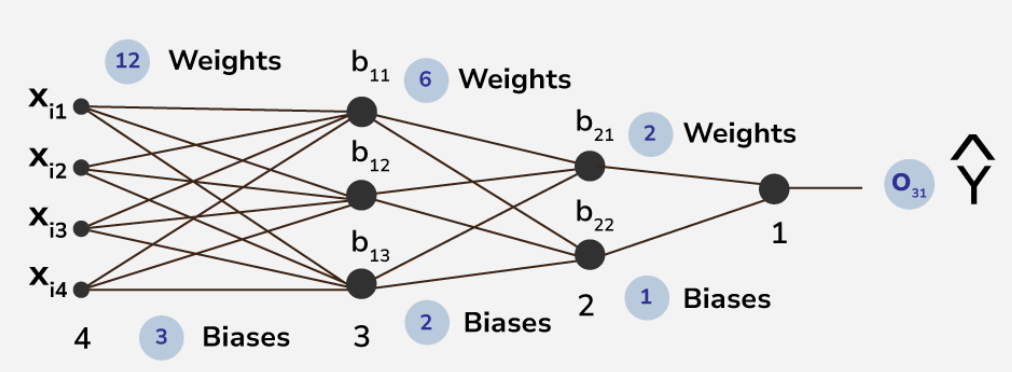

### 3.1.b Backpropagation 

- Theo `Coursera`, mạng neural backpropagation hoạt động bằng cách liên tục cho các node ghi nhận kết quả đầu ra và chạy ngược về lớp trước để đưa ra dự đoán tại mỗi layer. Điều này giúp mạng có thể học và cải thiện kết quả dự đoán một cách liên tục.  
- `Reference`: https://www.coursera.org/articles/how-do-neural-networks-work 

&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;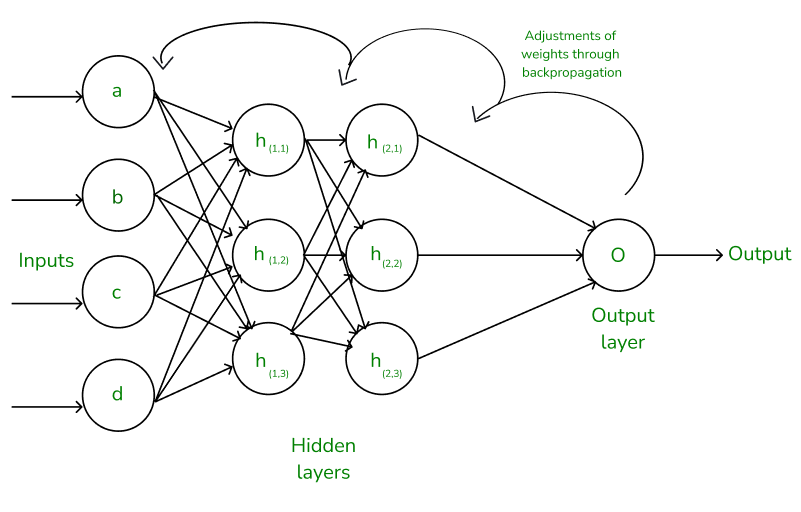 

## 3.2 Triển khai

### 3.2.a
### Reference: https://github.com/DreamyWanderer/Parallel_Computing-CNN_Parellelization-HCMUS.git
- Những file đã reference:
    - `demo_Fashion_MNIST.cc`: loại bỏ các lớp convolution và pooling, loại bỏ việc shuffle tập train data để đảm bảo tính đúng đắn, điều chỉnh learning rate, thêm chức năng tính thời gian chạy toàn bộ các epoch.
    - `config.h`
    - `CMakeLists.txt`
    - `/src`
        - `layer.h`
        - `loss.h`
        - `mnist.h`
        - `mnist.cc`
        - `network.h`: thêm hàm `print_total_times` giúp tính toán thời gian chạy mà mỗi layer chiếm.
        - `network.cc`: thêm code để tính thời gian chạy forward và backward của các layer, định nghĩa hàm `print_total_times`.
        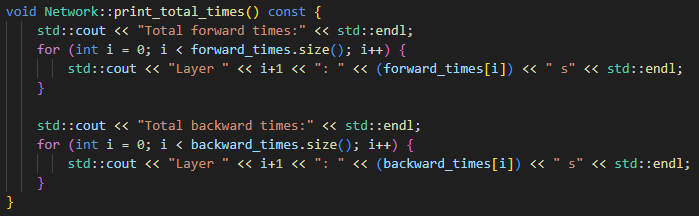
        - `optimizer.h`
        - `utils.h`: loại bỏ hàm shuffle data và seed cho hàm `set_normal_random` để đảm bảo tính đúng đắn.  
        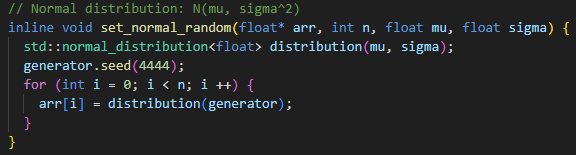
    - `/src/loss`
        - `sgd.h`
        - `sgd.cc`
    - `/src/optimizer`
        - `cross_entropy_loss.h`
        - `cross_entropy_loss.cc`
    - `/src/layer`
        - `relu.h`
        - `relu.cc`
        - `softmax.h`
        - `softmax.cc`
        - `dense.h`: reference từ `fully_connected.h` trên github. Khai báo thêm 2 version của forward và backward trên Host và Device.
        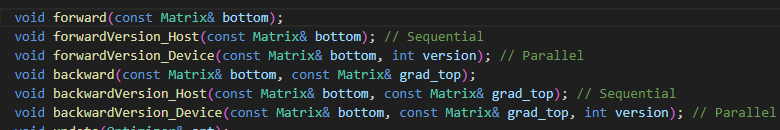
        - `dense.cc`: reference từ `fully_connected.cc` trên github. Reference hàm `init`, `update`, `get_parameters`, `set_parameters`, `get_derivatives`. 
                      Các hàm còn lại là tự cài đặt.
        - `cuda_utilities.h`: bỏ hàm `unrollGPUWrapper`.
        - `cuda_utilities.cu`: chỉnh sửa hàm `matrixMultiplicationGPUWrapper`, thêm switch để đổi kernel cho từng version. Các hàm còn lại là tự cài đặt.

### 3.2.b Cấu trúc mã nguồn
- `demo_Fashion_MNIST.cc`: file chính của hệ thống, khởi tạo các mạng và thực hiện train, test mô hình.
- `/src`:
    - `layer`: khai báo cho class Layer tượng trưng cho các layer trong mạng, được sử dụng bởi `dense`, `relu` và `softmax`.
    - `loss`: khai báo class Loss cho hàm mất mát, được sử dụng bởi `cross_entropy_loss`.
    - `mnist`: là file dùng để đọc bộ dữ liệu Fashion-MNIST và lưu vào object MNIST, object đó sẽ đọc các bộ dữ liệu bằng hàm `read_mnist_data` và `read_mnist_label` và lưu vào các ma trận `train_data`, `train_labels`, `test_data`, `test_labels`.
    - `network`: cấu tạo của mạng, chứa các layer và chứa hàm thực hiện hành động của chúng như `forward`, `backward` và `update`.
    - `optimizer`: khai báo class Optimizer dùng cho hàm cập nhật trọng số, được sử dụng bởi `sgd`.
    - `utils`: chứa các hàm hỗ trợ như khởi tạo trọng số cho các neuron, mã hóa one-hot cho tập label để sử dụng cho hàm mất mát cross entropy và hàm tính toán độ chính xác dựa trên tập test.
- `/src/loss`:
    - `cross_entropy_loss`: hàm mất mát cross entropy được dùng để đánh giá độ hiệu quả của một mô hình phân loại đa lớp (multi-class classification). Nó tính toán ra một con số cụ thể mô tả sự khác biệt giữa phân phối giữa tập dự đoán và tập label, nếu mô hình trả về trọng số lớn cho kết quả đúng thì cross entropy sẽ thấp và ngược lại. Từ hàm mất mát, chúng ta có thể đạo hàm để tìm ra gradient cho trọng số để cải thiện mô hình. Bên dưới là mô tả cho công thức tính cross entropy loss:  
        - `Reference`: https://www.geeksforgeeks.org/categorical-cross-entropy-in-multi-class-classification/     
         
    &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;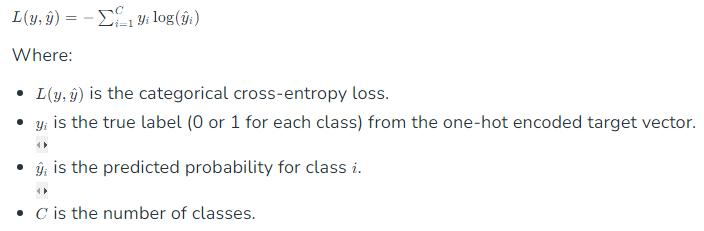  
          
- `/src/optimizer`:
    - `sgd`: hàm stochastic gradient descent được tác giả reference từ hàm SGD của thư viện pytorch, đây là một biến thể của thuật toán gradient descent, thay vì cập nhật trọng số sau mỗi lần chạy trên toàn dataset thì SGD sẽ cập nhật sau mỗi batch nhỏ. Các tham số đầu vào bao gồm learning rate, weight decay, momentum, ngoài ra có thể áp dụng thêm nesterov accelerated gradient lên công thức SGD để tăng tốc độ hội tụ.   
        - `Reference`: https://machinelearningcoban.com/2017/01/16/gradientdescent2/#gradient-descent-voi-momentum  
          
    &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;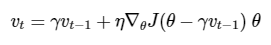     
    &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;Nesterov accelerated gradient  
      
    &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;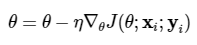  
    &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;Stochastic gradient descent  
   
- `/src/layer`:
    - `relu`: hàm ReLU (rectified linear unit) là một hàm activation giúp giải quyết được vấn đề vanishing gradient bằng cách chỉ giữ lại những trọng số dương, những trọng số âm sẽ được chuyển về giá trị 0, giúp đơn giản hóa hàm tính toán.  
       
    &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;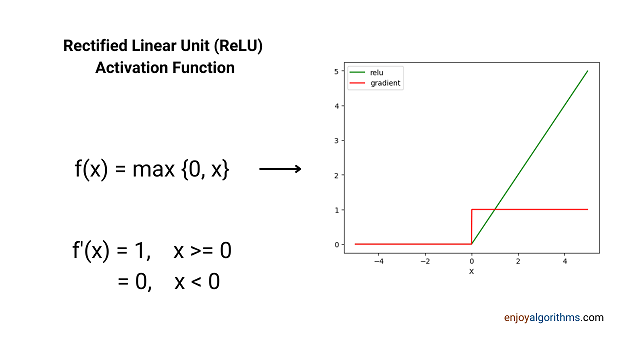  
      
    - `softmax`: hàm softmax là hàm dùng để chuyển đổi phân phối trọng số từ kết quả dự đoán của mô hình (logits) thành dạng phân phối xác suất có tổng bằng 1 để có thể hiểu được dự đoán mà mô hình đưa ra.  
        - `Reference`: https://www.singlestore.com/blog/a-guide-to-softmax-activation-function/ 
        
    &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;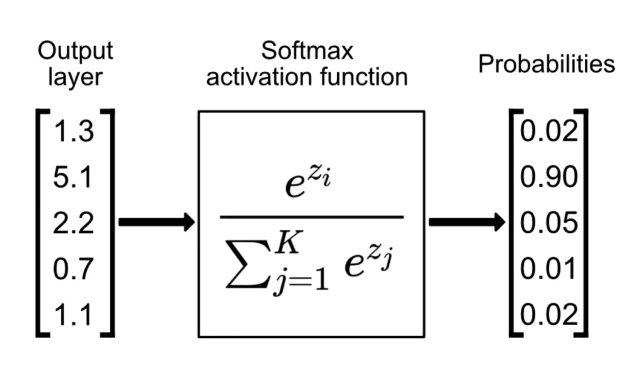     
        
    - `dense`: chứa các định nghĩa về dense layer, bao gồm kích thước đầu vào, đầu ra và các hoạt động của chúng như forward propagation và backpropagation. Các hàm forward và backward được chia ra thành 5 version, version 1 sử dụng CPU để tính toán phép nhân ma trận được định nghĩa ở đây, 4 version còn lại được song song hóa và sử dụng hàm `matrixMultiplicationGPUWrapper` để ánh xạ dữ liệu sang GPU và thực hiện tính toán dựa theo version đã chọn. Hàm forward tính trọng số theo công thức Z = w*x + b, hàm backward tính gradient của trọng số tại layer đang xét, bias và gradient của hàm mất mát để lan ngược về layer trước.   
         
    &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;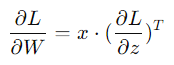     
    &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;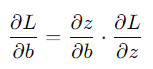    
    &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;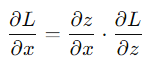    
         
    - `cuda_utilities`: chứa toàn bộ các hàm sử dụng để song song hóa, hàm `matrixMultiplicationGPUWrapper` cấp phát bộ nhớ trên GPU và tiếp nhận dữ liệu từ CPU để tính toán song song trên các kernel được định nghĩa trong cùng file. Có tổng cộng 4 version song song hóa phép nhân ma trận, bắt đầu từ kernel 1 đến version 4:  
        - `Kernel 1`: đây là hàm song song hóa phép nhân ma trận, không có áp dụng phương pháp tối ưu.
        - `Kernel 2`: áp dụng tiled shared memory, việc sử đụng SMEM giúp giảm chi phí cho việc truy cập, nhiều thread được truy cập và tính toán cùng lúc giúp tăng tốc cho hàm.   
        - `Kernel 3`: tiếp tục với kernel 2, áp dụng thêm phương pháp unrolling parallel loop, mục đích là giúp giảm số lần lặp cho việc tính toán song song, thay vào đó mỗi thread sẽ đảm nhận nhiều công việc hơn, điều này giúp giảm thiểu tình trạng 1 thread có quá nhiều công việc và 1 thread ở trạng thái nghỉ.
            - `Reference`: https://www.nvidia.com/docs/IO/116711/sc11-unrolling-parallel-loops.pdf 
        - `Kernel 4`: sử dụng hàm tương tự kernel 1 nhưng thay đổi giá trị float thành dạng half (FP16), nghĩa là mức độ chiếm dụng của kiểu dữ liệu half chỉ bằng một nửa so với kiểu dữ liệu float, việc trọng số half có độ chính xác thấp hơn float giúp việc tính toán cũng nhanh hơn nhưng đánh đổi lại bằng việc độ chính xác dự đoán của mô hình sẽ bị giảm.

# 4. Build & Run

### Việc đảm bảo tính đúng đắn của việc kiểm thử đã được đảm bảo, dữ liệu đầu vào là tập cố định, ma trận khởi tạo trọng số ngãu nhiên cũng đã được seed để cố định cho lần chạy. 

- Batch size = 100
- 3 epoch
- learning rate = 0.0001
- weight decay rate = 5e-4
- momentum 0.9

## Kết nối với Google Drive

In [12]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [29]:
%cd /content/drive/MyDrive/
%ls

/content/drive/MyDrive
 05_Research#01.zip   ANN-Final-Project/    'Colab Notebooks'/           LTSS/
 ANN_Fashion_MNIST/   ANN-Final-Project-2/   jdk-8u202-windows-x64.exe   video1264118106.mp4


In [30]:
!rm -r ANN_Fashion_MNIST

## Clone Repositories từ Github về và thực hiện lưu vào drive

In [31]:
!git clone https://github.com/NgHoangQuan2204/ANN_Fashion_MNIST.git

Cloning into 'ANN_Fashion_MNIST'...
remote: Enumerating objects: 2289, done.
remote: Counting objects: 100% (199/199), done.
remote: Compressing objects: 100% (136/136), done.
remote: Total 2289 (delta 142), reused 115 (delta 62), pack-reused 2090 (from 1)
Receiving objects: 100% (2289/2289), 34.15 MiB | 13.25 MiB/s, done.
Resolving deltas: 100% (505/505), done.
Updating files: 100% (1885/1885), done.


In [32]:
projectDirRootName = "/content/drive/MyDrive/ANN_Fashion_MNIST/"

In [33]:
%cd {projectDirRootName}
%ls

/content/drive/MyDrive/ANN_Fashion_MNIST
CMakeLists.txt  data/                  LICENSE    report.ipynb  third_party/
config.h        demo_Fashion_MNIST.cc  README.md  src/


In [34]:
%rm -r build
%mkdir build
%cd build
%ls

rm: cannot remove 'build': No such file or directory
/content/drive/MyDrive/ANN_Fashion_MNIST/build


## Khởi chạy CMake

In [35]:
!cmake ..

CMake Deprecation Warning at CMakeLists.txt:1 (cmake_minimum_required):
  Compatibility with CMake < 3.10 will be removed from a future version of
  CMake.

  Update the VERSION argument <min> value.  Or, use the <min>...<max> syntax
  to tell CMake that the project requires at least <min> but has been updated
  to work with policies introduced by <max> or earlier.


-- The CXX compiler identification is GNU 11.4.0
-- The CUDA compiler identification is NVIDIA 12.2.140 with host compiler GNU 11.4.0
-- Detecting CXX compiler ABI info
-- Detecting CXX compiler ABI info - done
-- Check for working CXX compiler: /usr/bin/c++ - skipped
-- Detecting CXX compile features
-- Detecting CXX compile features - done
-- Detecting CUDA compiler ABI info
-- Detecting CUDA compiler ABI info - done
-- Check for working CUDA compiler: /usr/local/cuda/bin/nvcc - skipped
-- Detecting CUDA compile features
-- Detecting CUDA compile features - done
-- Configuring done (4.6s)
-- Generating done (0.3s)
-- Bui

In [36]:
!make

[ -9%] Building CXX object src/CMakeFiles/MiniDNNLib.dir/mnist.cc.o
[  0%] Building CXX object src/CMakeFiles/MiniDNNLib.dir/network.cc.o
[  9%] Building CUDA object src/CMakeFiles/MiniDNNLib.dir/layer/cuda_utilities.cu.o
[ 18%] Building CXX object src/CMakeFiles/MiniDNNLib.dir/layer/dense.cc.o
[ 27%] Building CXX object src/CMakeFiles/MiniDNNLib.dir/layer/relu.cc.o
[ 36%] Building CXX object src/CMakeFiles/MiniDNNLib.dir/layer/softmax.cc.o
[ 45%] Building CXX object src/CMakeFiles/MiniDNNLib.dir/loss/cross_entropy_loss.cc.o
[ 54%] Building CXX object src/CMakeFiles/MiniDNNLib.dir/optimizer/sgd.cc.o
[ 63%] Linking CXX static library libMiniDNNLib.a
[ 63%] Built target MiniDNNLib
[ 72%] Building CXX object CMakeFiles/demo.dir/demo_Fashion_MNIST.cc.o
[ 81%] Linking CXX executable demo
[ 81%] Built target demo


## Tính toán trên Host

### Version 1: Tính tuần tự phép nhân ma trận



In [ ]:
%cd {projectDirRootName}build
%ls
!chmod 755 demo
!./demo 1 1 1

/content/drive/MyDrive/ANN_Fashion_MNIST/build
CMakeCache.txt  CMakeFiles/  cmake_install.cmake  demo*  Makefile  src/
../data/fashion-mnist/
mnist train number: 60000
mnist test number: 10000

Current version: 1

0-th batch, train loss: 2.28441
100-th batch, train loss: 1.31199
200-th batch, train loss: 0.928974
300-th batch, train loss: 0.747459
400-th batch, train loss: 0.602414
500-th batch, train loss: 0.665508
Accuracy on test set: 0.7893

0-th batch, train loss: 0.473069
100-th batch, train loss: 0.446684
200-th batch, train loss: 0.462422
300-th batch, train loss: 0.650596
400-th batch, train loss: 0.516065
500-th batch, train loss: 0.52883
Accuracy on test set: 0.8224

0-th batch, train loss: 0.363559
100-th batch, train loss: 0.35161
200-th batch, train loss: 0.398211
300-th batch, train loss: 0.601566
400-th batch, train loss: 0.494888
500-th batch, train loss: 0.49993
Accuracy on test set: 0.8326

Final accuracy: 0.8326
Train time: 9204 s
Total forward times:
Layer 1: 0 s
L

## Tính toán trên Device

### Version 2: Song song hóa việc tính toán phép nhân ma trận

In [ ]:
%cd {projectDirRootName}build
%ls
!chmod 755 demo
!./demo 2 2 1

/content/drive/MyDrive/ANN_Fashion_MNIST/build
CMakeCache.txt  CMakeFiles/  cmake_install.cmake  demo*  Makefile  src/
../data/fashion-mnist/
mnist train number: 60000
mnist test number: 10000

Current version: 2

0-th batch, train loss: 2.28441
100-th batch, train loss: 1.91994
200-th batch, train loss: 1.30054
300-th batch, train loss: 0.888021
400-th batch, train loss: 0.742252
500-th batch, train loss: 0.818353
Accuracy on test set: 0.7111

0-th batch, train loss: 0.658462
100-th batch, train loss: 0.599193
200-th batch, train loss: 0.629455
300-th batch, train loss: 0.718847
400-th batch, train loss: 0.585832
500-th batch, train loss: 0.618336
Accuracy on test set: 0.797

0-th batch, train loss: 0.443608
100-th batch, train loss: 0.461224
200-th batch, train loss: 0.492661
300-th batch, train loss: 0.639989
400-th batch, train loss: 0.546549
500-th batch, train loss: 0.543569
Accuracy on test set: 0.8156

Final accuracy: 0.8156
Train time: 496 s
Total forward times:
Layer 1: 0 s
L

### Version 3: Tối ưu bằng tiled shared memory

In [ ]:
%cd {projectDirRootName}build
%ls
!chmod 755 demo
!./demo 3 3 1

/content/drive/MyDrive/ANN_Fashion_MNIST/build
CMakeCache.txt  CMakeFiles/  cmake_install.cmake  demo*  Makefile  src/
../data/fashion-mnist/
mnist train number: 60000
mnist test number: 10000

Current version: 3

0-th batch, train loss: 2.28441
100-th batch, train loss: 1.91994
200-th batch, train loss: 1.30054
300-th batch, train loss: 0.888021
400-th batch, train loss: 0.742252
500-th batch, train loss: 0.818353
Accuracy on test set: 0.7111

0-th batch, train loss: 0.658462
100-th batch, train loss: 0.599193
200-th batch, train loss: 0.629455
300-th batch, train loss: 0.718847
400-th batch, train loss: 0.585832
500-th batch, train loss: 0.618336
Accuracy on test set: 0.797

0-th batch, train loss: 0.443608
100-th batch, train loss: 0.461224
200-th batch, train loss: 0.492661
300-th batch, train loss: 0.639989
400-th batch, train loss: 0.546549
500-th batch, train loss: 0.543569
Accuracy on test set: 0.8156

Final accuracy: 0.8156
Train time: 489 s
Total forward times:
Layer 1: 0 s
L

### Version 4: Tối ưu bằng việc sử dụng shared memory cùng với input matrix unrolling.

In [ ]:
%cd {projectDirRootName}build
%ls
!chmod 755 demo
!./demo 4 4 1

/content/drive/MyDrive/ANN_Fashion_MNIST/build
CMakeCache.txt  CMakeFiles/  cmake_install.cmake  demo*  Makefile  src/
../data/fashion-mnist/
mnist train number: 60000
mnist test number: 10000

Current version: 4

0-th batch, train loss: 2.28441
100-th batch, train loss: 1.91994
200-th batch, train loss: 1.30054
300-th batch, train loss: 0.888021
400-th batch, train loss: 0.742252
500-th batch, train loss: 0.818353
Accuracy on test set: 0.7111

0-th batch, train loss: 0.658462
100-th batch, train loss: 0.599193
200-th batch, train loss: 0.629455
300-th batch, train loss: 0.718847
400-th batch, train loss: 0.585832
500-th batch, train loss: 0.618336
Accuracy on test set: 0.797

0-th batch, train loss: 0.443608
100-th batch, train loss: 0.461224
200-th batch, train loss: 0.492661
300-th batch, train loss: 0.639989
400-th batch, train loss: 0.546549
500-th batch, train loss: 0.543569
Accuracy on test set: 0.8156

Final accuracy: 0.8156
Train time: 486 s
Total forward times:
Layer 1: 0 s
L

### Version 5: Tối ưu bằng cách sử dụng FP16 cho tính toán.

In [ ]:
%cd {projectDirRootName}build
%ls
!chmod 755 demo
!./demo 5 5 1

/content/drive/MyDrive/ANN_Fashion_MNIST/build
CMakeCache.txt  CMakeFiles/  cmake_install.cmake  demo*  Makefile  src/
../data/fashion-mnist/
mnist train number: 60000
mnist test number: 10000

Current version: 5

0-th batch, train loss: 2.28444
100-th batch, train loss: 1.92093
200-th batch, train loss: 1.30127
300-th batch, train loss: 0.888265
400-th batch, train loss: 0.74288
500-th batch, train loss: 0.818451
Accuracy on test set: 0.7115

0-th batch, train loss: 0.657844
100-th batch, train loss: 0.599518
200-th batch, train loss: 0.628761
300-th batch, train loss: 0.716963
400-th batch, train loss: 0.587792
500-th batch, train loss: 0.62032
Accuracy on test set: 0.7965

0-th batch, train loss: 0.444839
100-th batch, train loss: 0.461579
200-th batch, train loss: 0.490064
300-th batch, train loss: 0.635161
400-th batch, train loss: 0.551469
500-th batch, train loss: 0.542743
Accuracy on test set: 0.8142

Final accuracy: 0.8142
Train time: 494 s
Total forward times:
Layer 1: 0 s
La

## Thống kê các version
Version | Final Accuracy | Train Time (s)
--- | --- | ---
1 | 0.8326 | 9204
2 | 0.8156 | 496
3 | 0.8156 | 489
4 | 0.8156 | 486
5 | 0.8142 | 494

- Dựa trên mô tả những version đã triển khai ở mục `3.2.b`:
    - `Version 1`: thực hiện tính toán trên CPU, điều đó giúp kết quả đầu ra có độ chính xác cao, tuy nhiên đánh đổi lại bằng tốc độ chạy rất lâu.
    - `Version 2`: việc song song hóa đã cho thấy được sự cải thiện đáng kể về tốc độ mô hình, tuy nhiên độ chính xác từ việc tính toán trên GPU không bằng CPU.
    - `Version 3`: việc áp dụng tiled shared memory đã cải thiện được phần nhỏ tốc độ của mô hình.
    - `Version 4`: phương pháp unrolling parallel loop giúp tăng thêm một phần rất nhỏ tốc độ của mô hình.
    - `Version 5`: kết quả cho ta thấy được tốc độ của việc dùng FP16 có cải thiện so với FP32 và nó cũng chỉ ra nhược điểm tới từ việc lưu trữ số có độ chính xác thấp, đó là mô hình kết quả có độ chính xác thấp hơn so với các version trước.

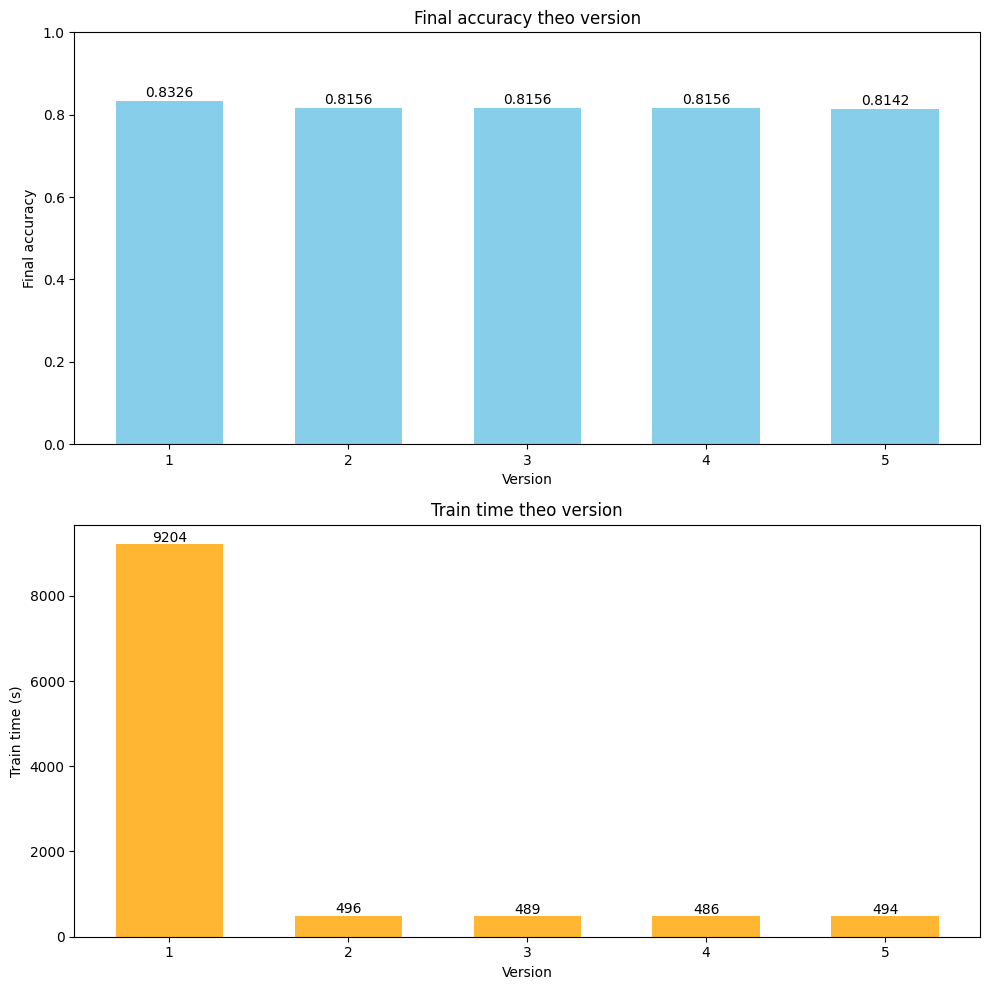